Image Shape :  (630, 630)


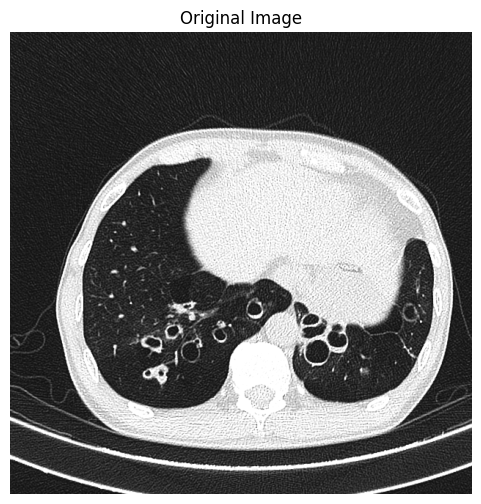

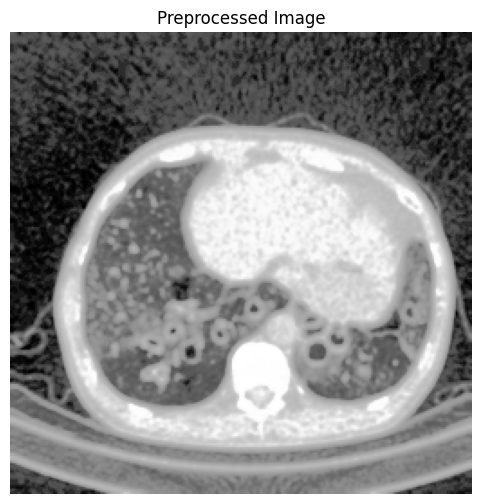

<ipython-input-7-d67029e1c108>:45: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  binary_image = closing(contrast_image > thresh, square(3))


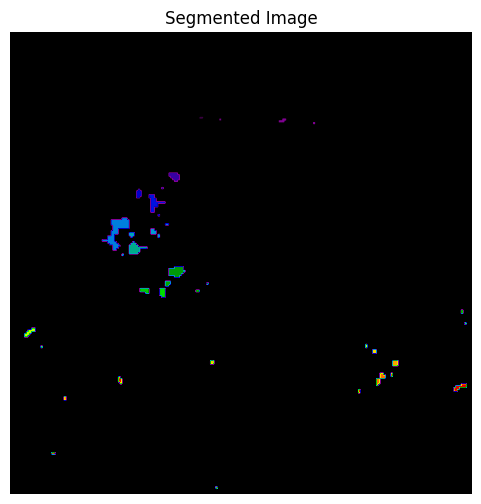

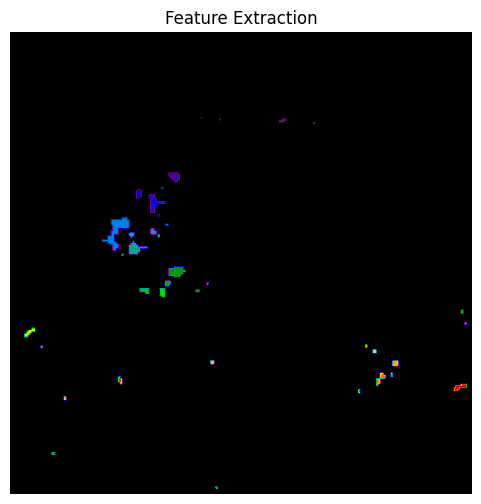

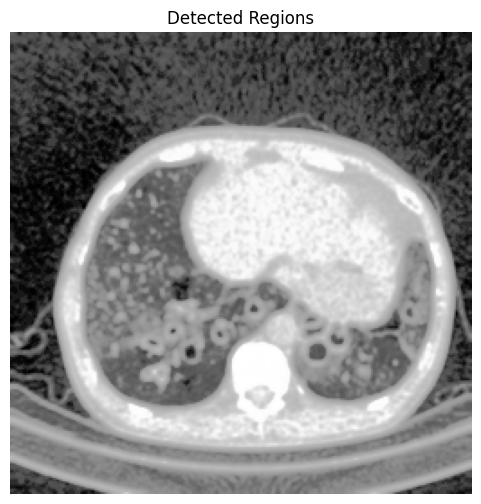

In [7]:
#Import Libraries
#Start by importing the necessary libraries for image analysis.
import numpy as np
import cv2
import skimage.io
import matplotlib.pyplot as plt
import skimage.color
from skimage import data, color, io, img_as_ubyte
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square

# Load a sample biomedical image
image_path = '/kaggle/input/biomedical-image/lung window(image analysis).jpeg' # Replace with your biomedical image
gray_image = skimage.io.imread(image_path)
print("Image Shape : ", image.shape)
#gray_image = skimage.color.rgb2gray(image)
# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

#Preprocess the Image
#Apply preprocessing techniques such as resizing, denoising, and contrast adjustment.
# Resize the image
resized_image = cv2.resize(gray_image, (256, 256))
# Denoise the image
denoised_image = cv2.GaussianBlur(resized_image, (5, 5), 0)
# Adjust the contrast (if necessary)
contrast_image = cv2.equalizeHist(img_as_ubyte(denoised_image))
# Display the preprocessed image
plt.figure(figsize=(6, 6))
plt.imshow(contrast_image, cmap='gray')
plt.title('Preprocessed Image')
plt.axis('off')
plt.show()

#Image Segmentation
#Perform image segmentation to identify regions of interest.
# Apply thresholding
thresh = threshold_otsu(contrast_image)
binary_image = closing(contrast_image > thresh, square(3))
# Remove artifacts connected to image border
cleared = clear_border(binary_image)
# Label image regions
label_image = label(cleared)
# Display the segmented image
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='nipy_spectral')
plt.title('Segmented Image')
plt.axis('off')
plt.show()

#Feature Extraction
#Extract features from the segmented regions.
# Extract region properties
regions = regionprops(label_image)
# Display properties of regions
for region in regions:
    # Take regions with large enough areas
    if region.area >= 100:
        print(f'Region {region.label}: Area={region.area}, Perimeter={region.perimeter}')
# Display the regions
plt.figure(figsize=(6, 6))
plt.imshow(label_image, cmap='nipy_spectral')

for region in regions:
    if region.area >= 100:
        # Draw rectangle around segmented regions
        minr, minc, maxr, maxc = region.bbox
        rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, edgecolor='red', linewidth=2)
        plt.gca().add_patch(rect)
plt.title('Feature Extraction')
plt.axis('off')
plt.show()

#Detection
#Detect specific features or regions based on extracted features.
# Detect specific features (e.g., regions with area &gt; 200)
for region in regions:
    if region.area > 200:
        print(f'Detected Region {region.label}: Area={region.area}, Perimeter={region.perimeter}')
        minr, minc, maxr, maxc = region.bbox
        cv2.rectangle(contrast_image, (minc, minr), (maxc, maxr), (255, 0, 0), 2)
# Display the detected regions
plt.figure(figsize=(6, 6))
plt.imshow(contrast_image, cmap='gray')
plt.title('Detected Regions')
plt.axis('off')
plt.show()

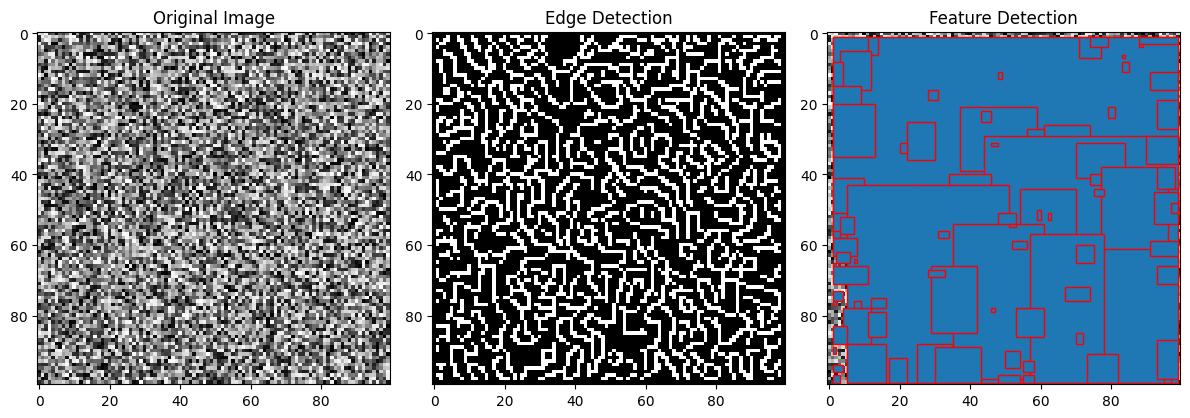

In [12]:
import cv2
import numpy as np
from skimage.feature import canny
from skimage.measure import label, regionprops 
import matplotlib.pyplot as plt

#Generate synthetic biomedical images (grayscale) 
images = [np.random.rand (100, 100) for _ in range (100)] 
#Preprocessing (Gaussian blur)
preprocessed_images = [cv2.GaussianBlur (img, (5, 5), 0) for img in images]
#Segmentation (Canny edge detection)
edges = [canny (img) for img in preprocessed_images]
# Feature extraction and detection (region properties) 
features= [regionprops (label (edge)) for edge in edges] 
#Display sample image, edges, and detected features 
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(images [0], cmap='gray') 
ax[0].set_title('Original Image') 
ax[1].imshow(edges [0], cmap='gray') 
ax[1].set_title('Edge Detection')
ax[2].imshow(images [0], cmap='gray')
for region in features [0]:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle ((minc, minr), maxc - minc, maxr - minr, edgecolor='red')
    ax [2].add_patch (rect)
ax[2].set_title('Feature Detection')
plt.tight_layout()
plt.show()